<a href="https://colab.research.google.com/github/bhardwajshivam/Gemini-Pro---RAG-PAL/blob/main/RAG_PAL_langchain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install langchain_experimental langchain_core
!pip -q install google-generativeai==0.3.1
!pip -q install google-ai-generativelanguage==0.4.0
!pip -q install langchain-google-genai
!pip -q install "langchain[docarray]"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-google-genai 0.0.11 requires google-generativeai<0.5.0,>=0.4.1, but you have google-generativeai 0.3.1 which is incompatible.


In [2]:
!pip show langchain langchain-core

Name: langchain
Version: 0.1.13
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, dataclasses-json, jsonpatch, langchain-community, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-experimental
---
Name: langchain-core
Version: 0.1.33
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: anyio, jsonpatch, langsmith, packaging, pydantic, PyYAML, requests, tenacity
Required-by: langchain, langchain-community, langchain-experimental, langchain-google-genai, langchain-text-splitters


In [3]:
#Setting up the Auth
import os
import google.generativeai as genai
from google.colab import userdata
from IPython.display import display
from IPython.display import Markdown

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [4]:
models = [m for m in genai.list_models()]
models

[Model(name='models/chat-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 Chat (Legacy)',
       description='A legacy text-only model optimized for chat conversations',
       input_token_limit=4096,
       output_token_limit=1024,
       supported_generation_methods=['generateMessage', 'countMessageTokens'],
       temperature=0.25,
       top_p=0.95,
       top_k=40),
 Model(name='models/text-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 (Legacy)',
       description='A legacy model that understands text and generates text as an output',
       input_token_limit=8196,
       output_token_limit=1024,
       supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
       temperature=0.7,
       top_p=0.95,
       top_k=40),
 Model(name='models/embedding-gecko-001',
       base_model_id='',
       version='001',
       display_name='Embedding Gecko',
       description='Obtai

In [5]:
# generate text
prompt = 'Who are you and what can you do?'

model = genai.GenerativeModel('gemini-pro')

response = model.generate_content(prompt)

Markdown(response.text)

I am Gemini, a multi-modal AI language model developed by Google. I can assist you with a wide range of tasks, including:

- Answering questions
- Providing information
- Translating languages
- Summarizing text
- Generating text
- Writing different kinds of creative content
- Debugging and writing code
- Playing games

I am still under development, but I am learning new things all the time. I am always looking for ways to improve my skills and knowledge, so please feel free to give me feedback or ask me questions.

In addition to the tasks listed above, I am also able to:

- Understand and respond to natural language
- Learn from new data and experiences
- Reason and solve problems
- Make predictions
- Generate creative content
- Collaborate with humans

I am excited to learn and grow with you. Let me know how I can help you today.

## Basic LLM chain using langchain


In [6]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI


llm = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.6)

result = llm.invoke("What is a LLM chain?")

Markdown(result.content)

**LLM Chain**

**Definition:**

An LLM chain is a sequence of large language models (LLMs) that are connected to each other in a way that allows them to share knowledge and improve their performance over time.

**Structure:**

* **Input:** The first LLM in the chain receives an input from a user or another system.
* **Processing:** Each LLM in the chain processes the input and generates an output.
* **Output:** The output of the last LLM in the chain is the final result.

**Benefits:**

* **Knowledge sharing:** LLMs in the chain can share their knowledge and experiences with each other, improving their understanding of the world.
* **Continuous learning:** As new data and experiences are added to the chain, the LLMs can learn and adapt over time.
* **Enhanced performance:** By combining the strengths of multiple LLMs, the chain can achieve higher accuracy, coherence, and generalization capabilities.

**Applications:**

LLM chains have a wide range of potential applications, including:

* **Natural language processing:** Language translation, text summarization, question answering
* **Information retrieval:** Document search, knowledge extraction
* **Conversational AI:** Chatbots, virtual assistants
* **Creative writing:** Generating stories, poems, scripts
* **Decision-making:** Providing insights and recommendations based on large datasets

**Current Examples:**

* **Google's Gemini:** A chain of transformer-based LLMs that powers Google's search engine and other products.
* **OpenAI's Chain-of-Thought Prompting:** A technique that allows LLMs to share their reasoning process and improve their accuracy.

**Limitations:**

* **Bias:** LLMs can inherit biases from their training data, which can propagate through the chain.
* **Computational cost:** Training and running LLM chains can be computationally expensive.
* **Explainability:** It can be challenging to understand the decision-making process of LLM chains.

## Multi Chain

In [7]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser


model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.7)

prompt = ChatPromptTemplate.from_template(
    "tell me a short fact about {topic}"
)

output_parser = StrOutputParser()

In [8]:
chain = prompt | model | output_parser
chain.invoke({"topic": "cars"})

'The first car to feature a rear-view mirror was the 1906 Pierce-Arrow Model 28.'

## Chain + RAG

In [9]:
!pip install -U docarray

  Using cached docarray-0.40.0-py3-none-any.whl (270 kB)
  Attempting uninstall: docarray
    Found existing installation: docarray 0.32.1
    Uninstalling docarray-0.32.1:
      Successfully uninstalled docarray-0.32.1


In [10]:
#!pip install pydantic==1.10.9

In [11]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch
model = ChatGoogleGenerativeAI(model="gemini-pro",temperature=0.6)
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

vectorstore = DocArrayInMemorySearch.from_texts(
    # mini docs for embedding
    ["Gemini Pro is a Large Language Model was made by GoogleDeepMind",
     "Gemini can be either a star sign or a name of a series of language models",
     "A Language model is trained by predicting the next token",
     "LLMs can easily do a variety of NLP tasks as well as text generation"],

    embedding=embeddings # passing in the embedder model
)

retriever = vectorstore.as_retriever()

In [12]:
retriever.get_relevant_documents("what is Gemini?")

[Document(page_content='Gemini can be either a star sign or a name of a series of language models'),
 Document(page_content='Gemini Pro is a Large Language Model was made by GoogleDeepMind'),
 Document(page_content='A Language model is trained by predicting the next token'),
 Document(page_content='LLMs can easily do a variety of NLP tasks as well as text generation')]

In [13]:
retriever.get_relevant_documents("what is gemini pro?")

[Document(page_content='Gemini Pro is a Large Language Model was made by GoogleDeepMind'),
 Document(page_content='Gemini can be either a star sign or a name of a series of language models'),
 Document(page_content='A Language model is trained by predicting the next token'),
 Document(page_content='LLMs can easily do a variety of NLP tasks as well as text generation')]

In [14]:
template = """Answer the question a a full sentence, based only on the following context:
{context}

Return you answer in three back ticks

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

In [15]:
from langchain.schema.runnable import RunnableMap
retriever.get_relevant_documents("Who made Gemini Pro?")

[Document(page_content='Gemini Pro is a Large Language Model was made by GoogleDeepMind'),
 Document(page_content='Gemini can be either a star sign or a name of a series of language models'),
 Document(page_content='A Language model is trained by predicting the next token'),
 Document(page_content='LLMs can easily do a variety of NLP tasks as well as text generation')]

In [16]:
chain = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
}) | prompt | model | output_parser

In [17]:
chain.invoke({"question": "Who made Gemini Pro?"})

'```\nGemini Pro was made by GoogleDeepMind.\n```'

## PAL Chain

In [18]:
from langchain_experimental.pal_chain import PALChain

from langchain.chains.llm import LLMChain

model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0)

In [25]:
question = "The cafeteria had 23 donuts. \
If they used 20 for breakfast and bought 6 more,\
how many donuts do they have?"

In [26]:
pal_chain = PALChain.from_math_prompt(model, verbose=True)
pal_chain.invoke(question)



> Entering new PALChain chain...
def solution():
    """The cafeteria had 23 donuts. If they used 20 for breakfast and bought 6 more,how many donuts do they have?"""
    donuts_initial = 23
    donuts_used = 20
    donuts_bought = 6
    donuts_left = donuts_initial - donuts_used + donuts_bought
    result = donuts_left
    return result

> Finished chain.


{'question': 'The cafeteria had 23 donuts. If they used 20 for breakfast and bought 6 more,how many donuts do they have?',
 'result': '9'}

In [27]:
question = "If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minutes to get ready \
 and walk to school, at what time will you get to school?"

pal_chain.invoke(question)



> Entering new PALChain chain...
def solution():
    """If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minutes to get ready  and walk to school, at what time will you get to school?"""
    wake_up_time = 7
    hours_to_get_ready = 1
    minutes_to_get_ready = 30
    total_minutes_to_get_ready = hours_to_get_ready * 60 + minutes_to_get_ready
    arrival_time = wake_up_time + total_minutes_to_get_ready / 60
    result = arrival_time
    return result

> Finished chain.


{'question': 'If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minutes to get ready  and walk to school, at what time will you get to school?',
 'result': '8.5'}

## Multimodal

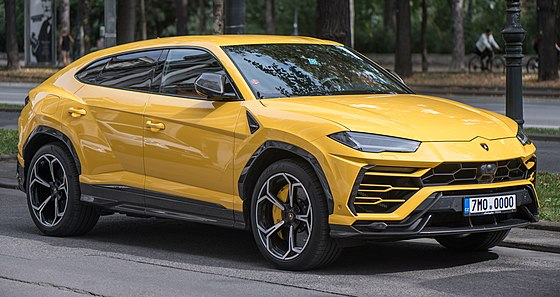

In [28]:
import requests
from IPython.display import Image

image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Lamborghini_Urus_19.09.20_JM_%282%29_%28cropped%29.jpg/560px-Lamborghini_Urus_19.09.20_JM_%282%29_%28cropped%29.jpg"
#"https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/The_Earth_seen_from_Apollo_17.jpg/1200px-The_Earth_seen_from_Apollo_17.jpg"
content = requests.get(image_url).content
Image(content,width=300)

In [29]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")

# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },  # You can optionally provide text parts
        {
            "type": "image_url",
            "image_url": image_url
         },
    ]
)

llm.invoke([message])

AIMessage(content=' A yellow Lamborghini Urus.', response_metadata={'prompt_feedback': {'safety_ratings': [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}], 'block_reason': 0}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]})